# Illustration of the feedforward neural network's performance for a binary classification task using the example of three different pairs of iris species combinations

In [12]:
import random
import time

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd

from vladk_neural_network.model.activation import LeakyRelu, Sigmoid
from vladk_neural_network.model.base import NeuralNetwork
from vladk_neural_network.model.layer import FullyConnected, Input
from vladk_neural_network.model.loss import BinaryCrossEntropy
from vladk_neural_network.model.metric import Accuracy
from vladk_neural_network.model.optimizer import Adam

## Helper functions for displaying changes in loss and Accuracy with the change of epochs

In [13]:
def plot_loss(epoch, train_loss, test_loss, title):
    plt.figure(figsize=(10, 8))
    plt.plot(epoch, train_loss, color='r', label='Train')
    plt.plot(epoch, test_loss, color='g', label='Test')
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

def plot_accuracy_score(epoch, train_metric, test_metric, title):
    plt.figure(figsize=(10, 8))
    plt.plot(epoch, train_metric, color='r', label='Train')
    plt.plot(epoch, test_metric, color='g', label='Test')
    plt.xlabel('epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

## Function to display selected iris sample data with species shown on the sepal width - sepal height and petal width - petal height coordinates

In [14]:
def iris_plot(data, species_names, title):

    sepal_length, sepal_width, petal_length, petal_width, colors = [], [], [], [], []

    for row in data:
        sepal_length.append(row['input'][0])
        sepal_width.append(row['input'][1])
        petal_length.append(row['input'][2])
        petal_width.append(row['input'][3])
        colors.append('red' if row['output'][0] == 0.0 else 'blue')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

    ax1.scatter(sepal_length, sepal_width, c=colors, alpha=0.5)
    red_patch = mpatches.Patch(color='red', label=species_names[0])
    blue_patch = mpatches.Patch(color='blue', label=species_names[1])
    ax1.legend(handles=[red_patch, blue_patch], title="Species")
    ax1.set_xlabel("sepal_length")
    ax1.set_ylabel("sepal_width")
    ax1.set_title(f"{title} for combination [{species_names[0]} - {species_names[1]}] in sepal coordinates")

    ax2.scatter(petal_length, petal_width, c=colors, alpha=0.5)
    red_patch = mpatches.Patch(color='red', label=species_names[0])
    blue_patch = mpatches.Patch(color='blue', label=species_names[1])
    ax2.legend(handles=[red_patch, blue_patch], title="Species")
    ax2.set_xlabel("petal_length")
    ax2.set_ylabel("petal_width")
    ax2.set_title(f"{title} for combination [{species_names[0]} - {species_names[1]}] in petal coordinates")

    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

    return

## Function to obtain a dataset for a specific species combination

In [15]:
def get_iris_dataset(species_to_compare, specie_to_exclude):

    data = pd.read_csv('../data/iris/Iris.csv')
    data.drop('Id', axis=1, inplace=True)
    data = data[data['Species'] != specie_to_exclude]
    with pd.option_context("future.no_silent_downcasting", True):
        data['Species'] = data['Species'].replace(species_to_compare[0], 0)
        data['Species'] = data['Species'].replace(species_to_compare[1], 1)
    data['Species'] = data['Species'].astype('float32')

    # normalization
    feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
    for feature_column in feature_columns:
        data[feature_column] = (data[feature_column] - data[feature_column].min())/(data[feature_column].max() - data[feature_column].min())
        data[feature_column] = data[feature_column].astype('float32')

    dataset = []
    for index in data.index:
        dataset.append({
            'input': data.loc[index].drop('Species').values,
            'output': [float(data.loc[index, 'Species'])]
        })

    random.shuffle(dataset)
    return dataset[:70], dataset[70:]

## Create models and test on all 3 possible pairs for species ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica') 

Testing combination Iris-setosa - Iris-versicolor
Epoch: 1/15, train loss: 0.2561, train Accuracy: 0.9143, test loss: 0.0035, test Accuracy: 1.0, epoch time: 0.063s
Epoch: 2/15, train loss: 0.0006, train Accuracy: 1.0, test loss: 0.0014, test Accuracy: 1.0, epoch time: 0.061s
Epoch: 3/15, train loss: 0.0002, train Accuracy: 1.0, test loss: 0.0008, test Accuracy: 1.0, epoch time: 0.06s
Epoch: 4/15, train loss: 0.0001, train Accuracy: 1.0, test loss: 0.0007, test Accuracy: 1.0, epoch time: 0.061s
Epoch: 5/15, train loss: 0.0, train Accuracy: 1.0, test loss: 0.0005, test Accuracy: 1.0, epoch time: 0.06s
Epoch: 6/15, train loss: 0.0, train Accuracy: 1.0, test loss: 0.0004, test Accuracy: 1.0, epoch time: 0.06s
Epoch: 7/15, train loss: 0.0, train Accuracy: 1.0, test loss: 0.0004, test Accuracy: 1.0, epoch time: 0.06s
Epoch: 8/15, train loss: 0.0, train Accuracy: 1.0, test loss: 0.0003, test Accuracy: 1.0, epoch time: 0.061s
Epoch: 9/15, train loss: 0.0, train Accuracy: 1.0, test loss: 0.000

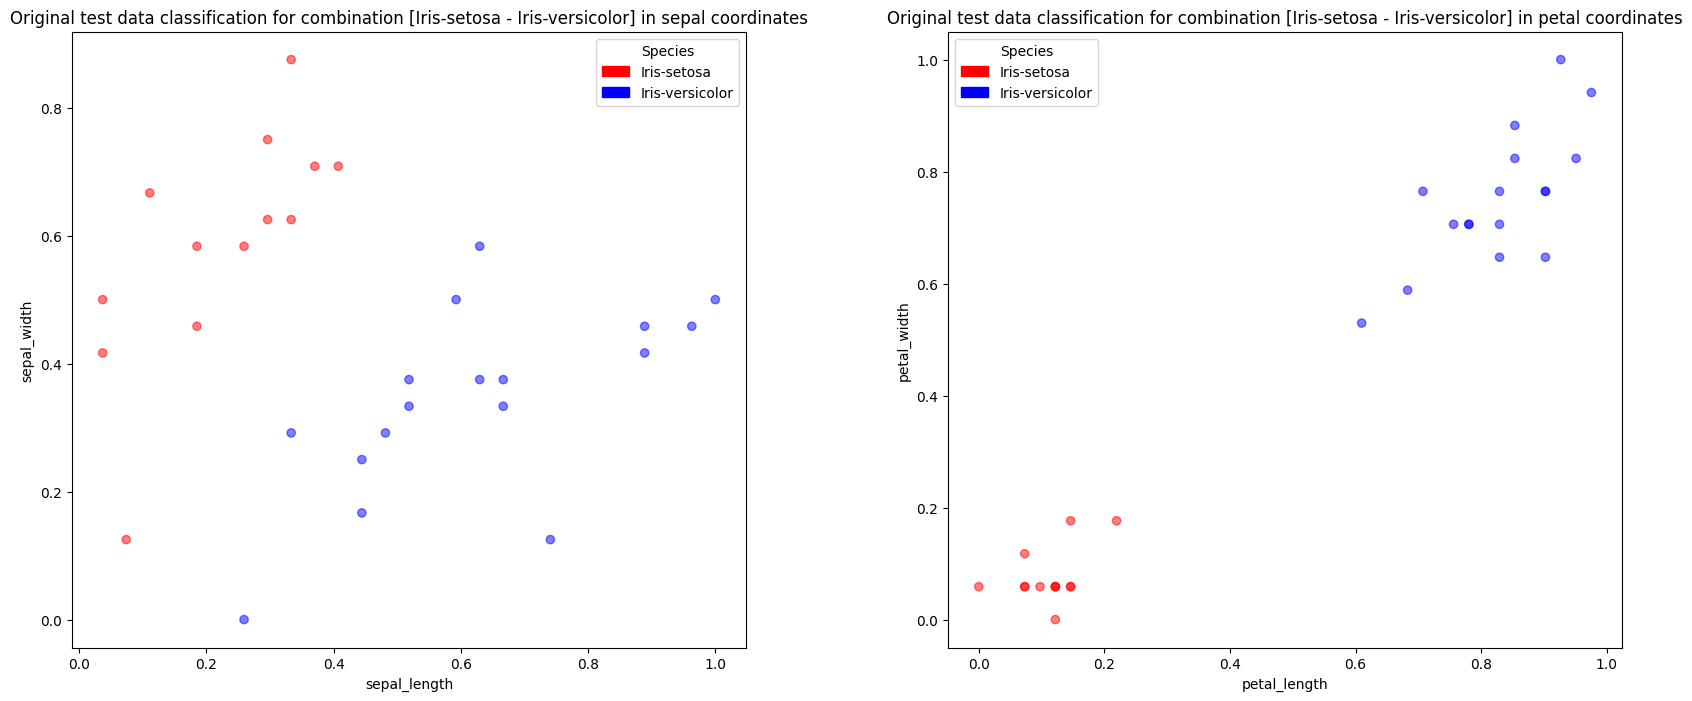

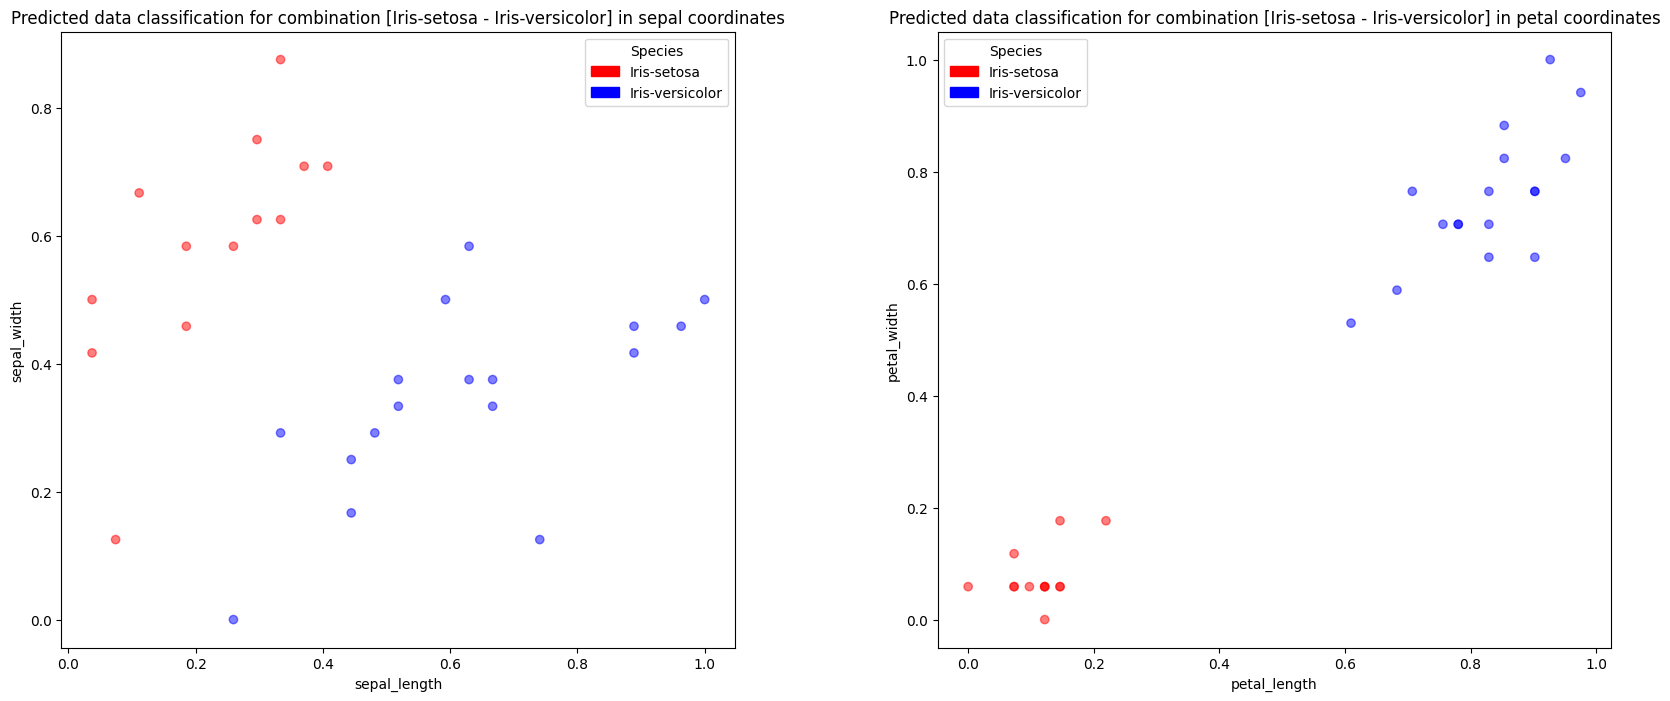

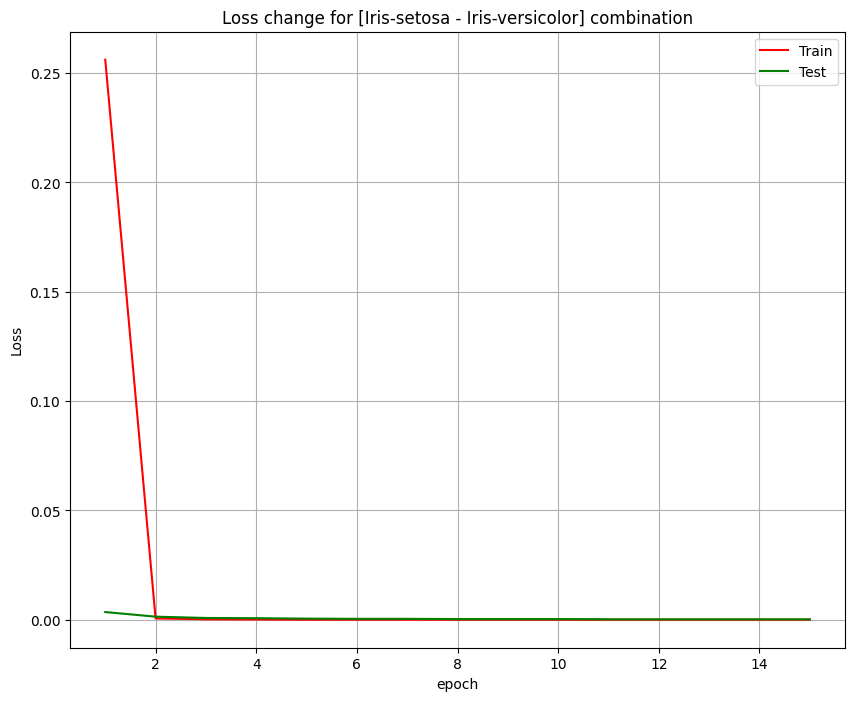

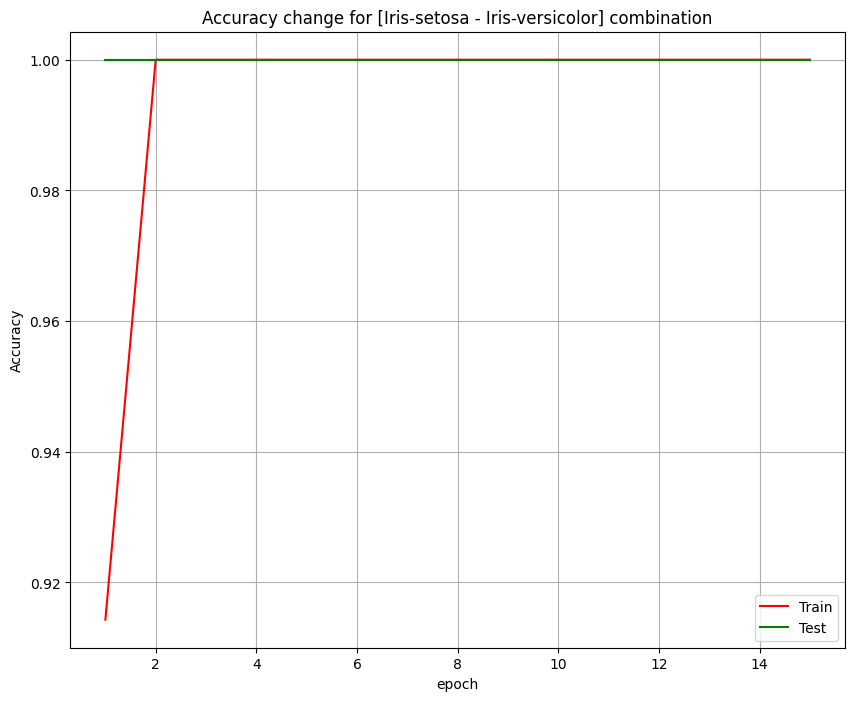

Testing combination Iris-versicolor - Iris-virginica
Epoch: 1/15, train loss: 0.5889, train Accuracy: 0.7, test loss: 0.5725, test Accuracy: 0.5667, epoch time: 0.059s
Epoch: 2/15, train loss: 0.2762, train Accuracy: 0.8857, test loss: 0.1439, test Accuracy: 0.9333, epoch time: 0.058s
Epoch: 3/15, train loss: 0.2074, train Accuracy: 0.9286, test loss: 0.1343, test Accuracy: 0.9333, epoch time: 0.059s
Epoch: 4/15, train loss: 0.2007, train Accuracy: 0.9, test loss: 0.1581, test Accuracy: 0.9333, epoch time: 0.06s
Epoch: 5/15, train loss: 0.1508, train Accuracy: 0.9286, test loss: 0.3263, test Accuracy: 0.8667, epoch time: 0.059s
Epoch: 6/15, train loss: 0.2396, train Accuracy: 0.9286, test loss: 0.15, test Accuracy: 0.9667, epoch time: 0.058s
Epoch: 7/15, train loss: 0.1366, train Accuracy: 0.9429, test loss: 0.1833, test Accuracy: 0.8667, epoch time: 0.059s
Epoch: 8/15, train loss: 0.1306, train Accuracy: 0.9571, test loss: 0.3485, test Accuracy: 0.8667, epoch time: 0.062s
Epoch: 9/15,

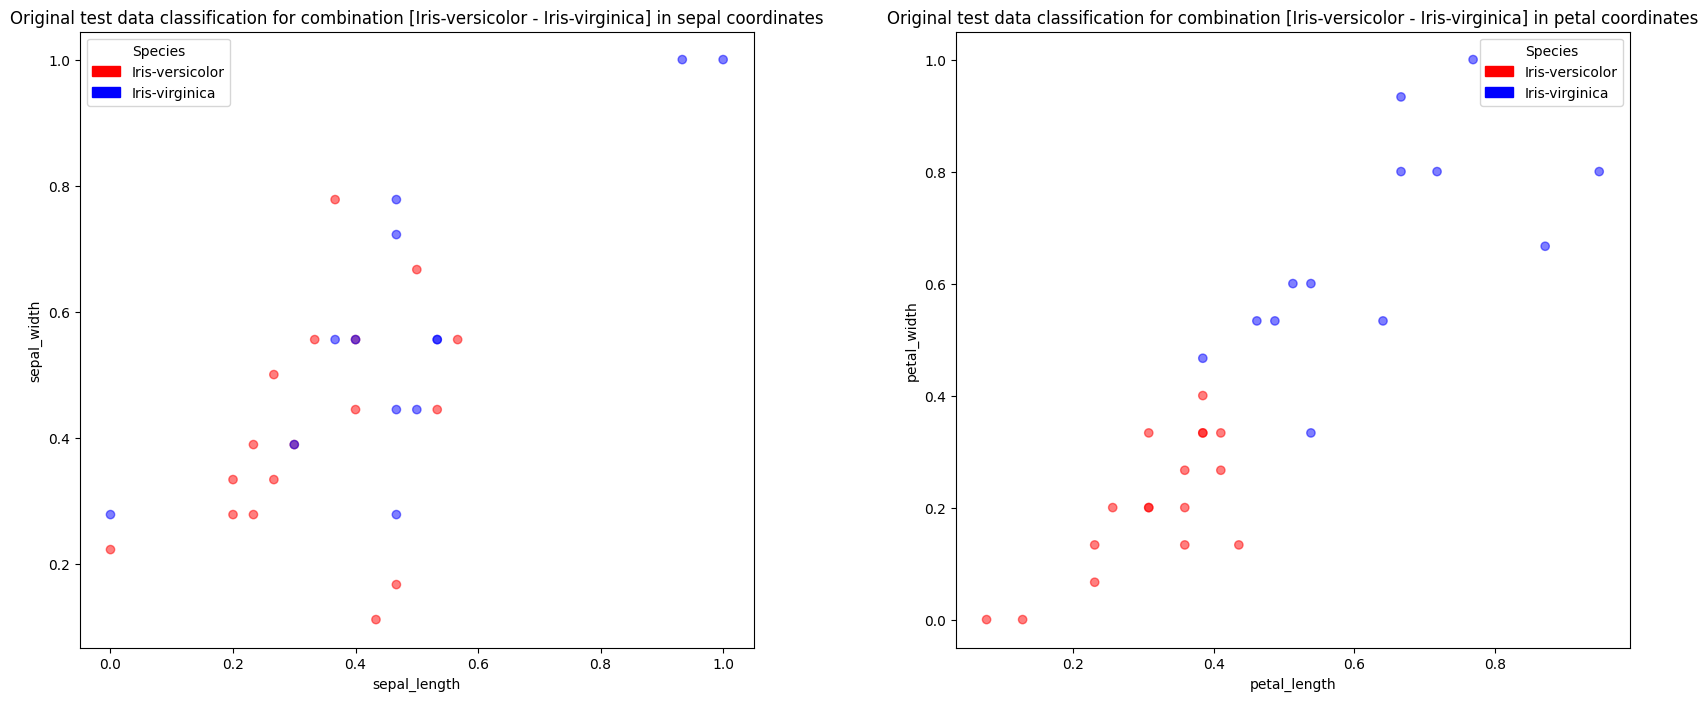

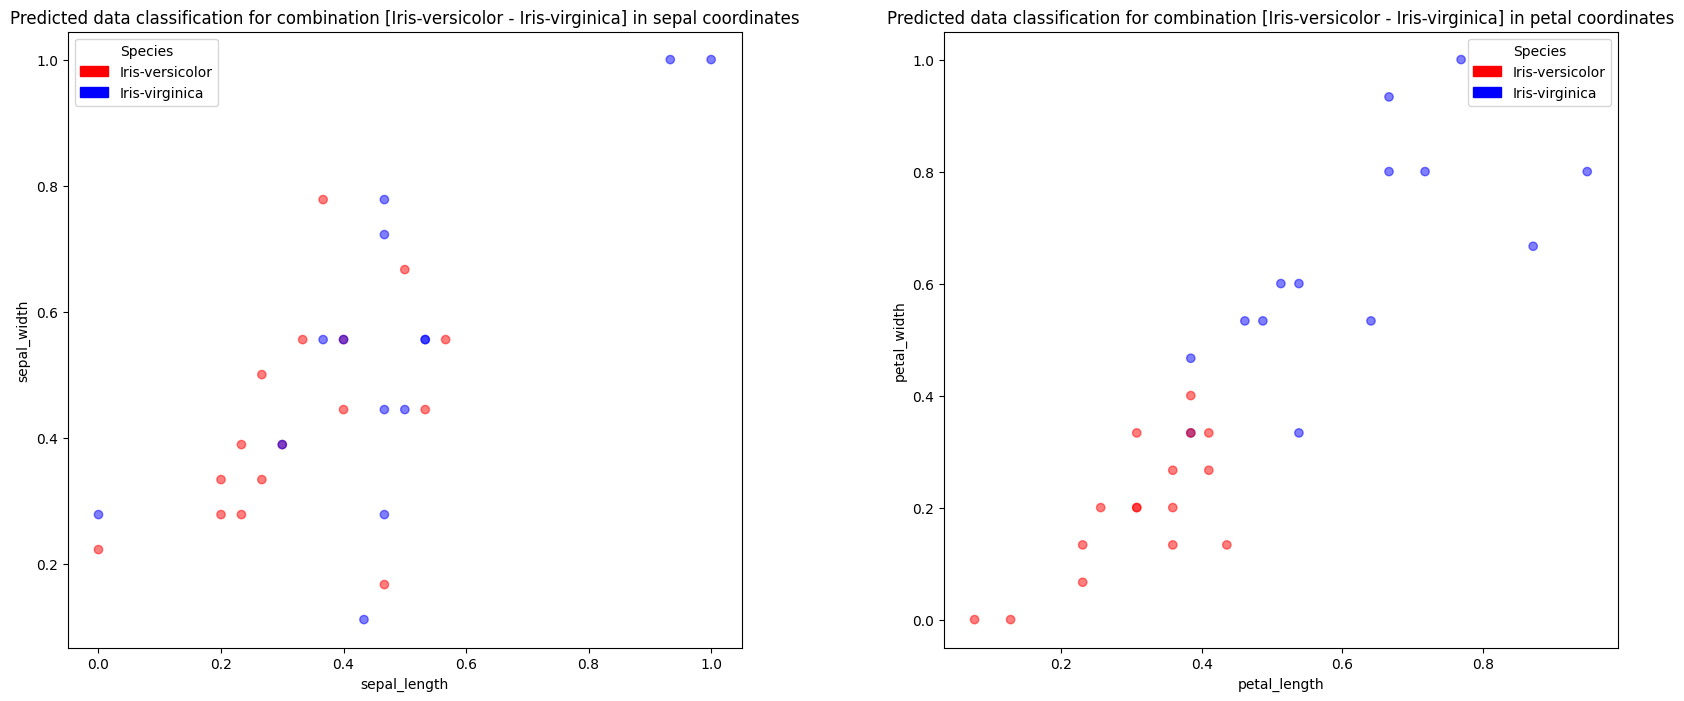

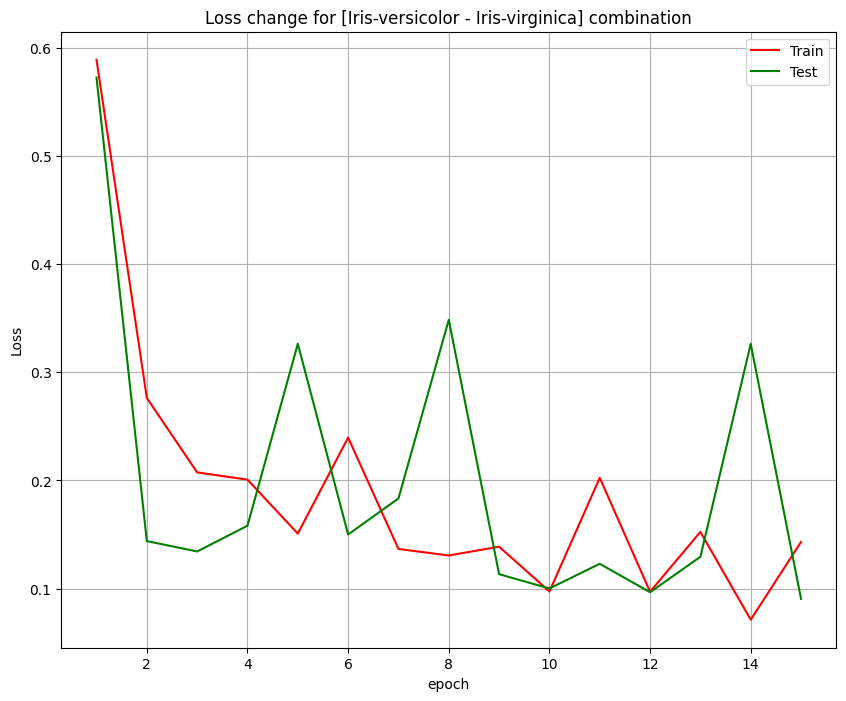

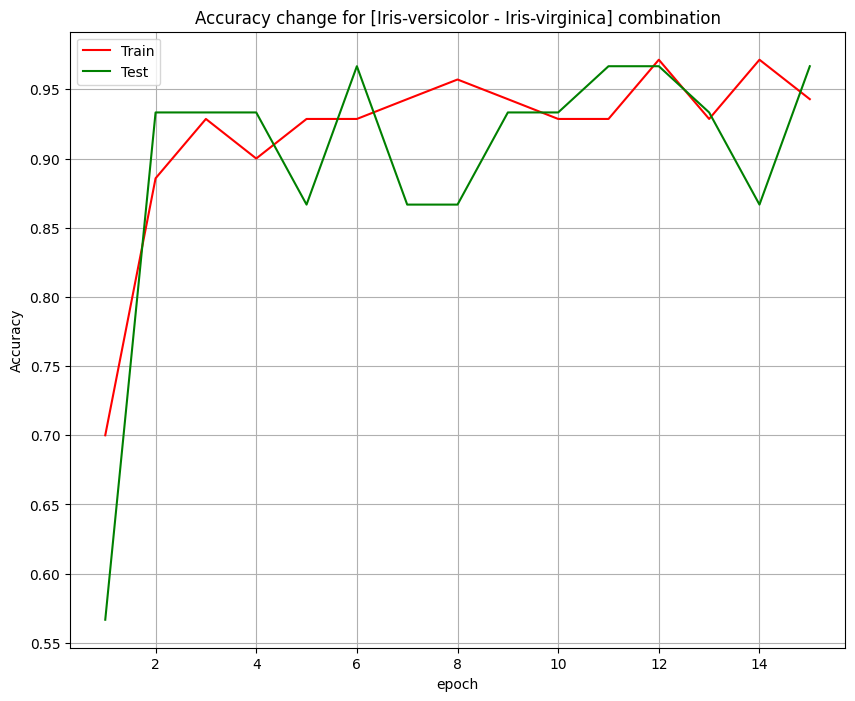

Testing combination Iris-setosa - Iris-virginica
Epoch: 1/15, train loss: 0.2525, train Accuracy: 0.8857, test loss: 0.0014, test Accuracy: 1.0, epoch time: 0.059s
Epoch: 2/15, train loss: 0.0011, train Accuracy: 1.0, test loss: 0.0002, test Accuracy: 1.0, epoch time: 0.061s
Epoch: 3/15, train loss: 0.0003, train Accuracy: 1.0, test loss: 0.0001, test Accuracy: 1.0, epoch time: 0.067s
Epoch: 4/15, train loss: 0.0002, train Accuracy: 1.0, test loss: 0.0001, test Accuracy: 1.0, epoch time: 0.065s
Epoch: 5/15, train loss: 0.0001, train Accuracy: 1.0, test loss: 0.0, test Accuracy: 1.0, epoch time: 0.061s
Epoch: 6/15, train loss: 0.0001, train Accuracy: 1.0, test loss: 0.0, test Accuracy: 1.0, epoch time: 0.062s
Epoch: 7/15, train loss: 0.0001, train Accuracy: 1.0, test loss: 0.0, test Accuracy: 1.0, epoch time: 0.066s
Epoch: 8/15, train loss: 0.0, train Accuracy: 1.0, test loss: 0.0, test Accuracy: 1.0, epoch time: 0.073s
Epoch: 9/15, train loss: 0.0, train Accuracy: 1.0, test loss: 0.0, 

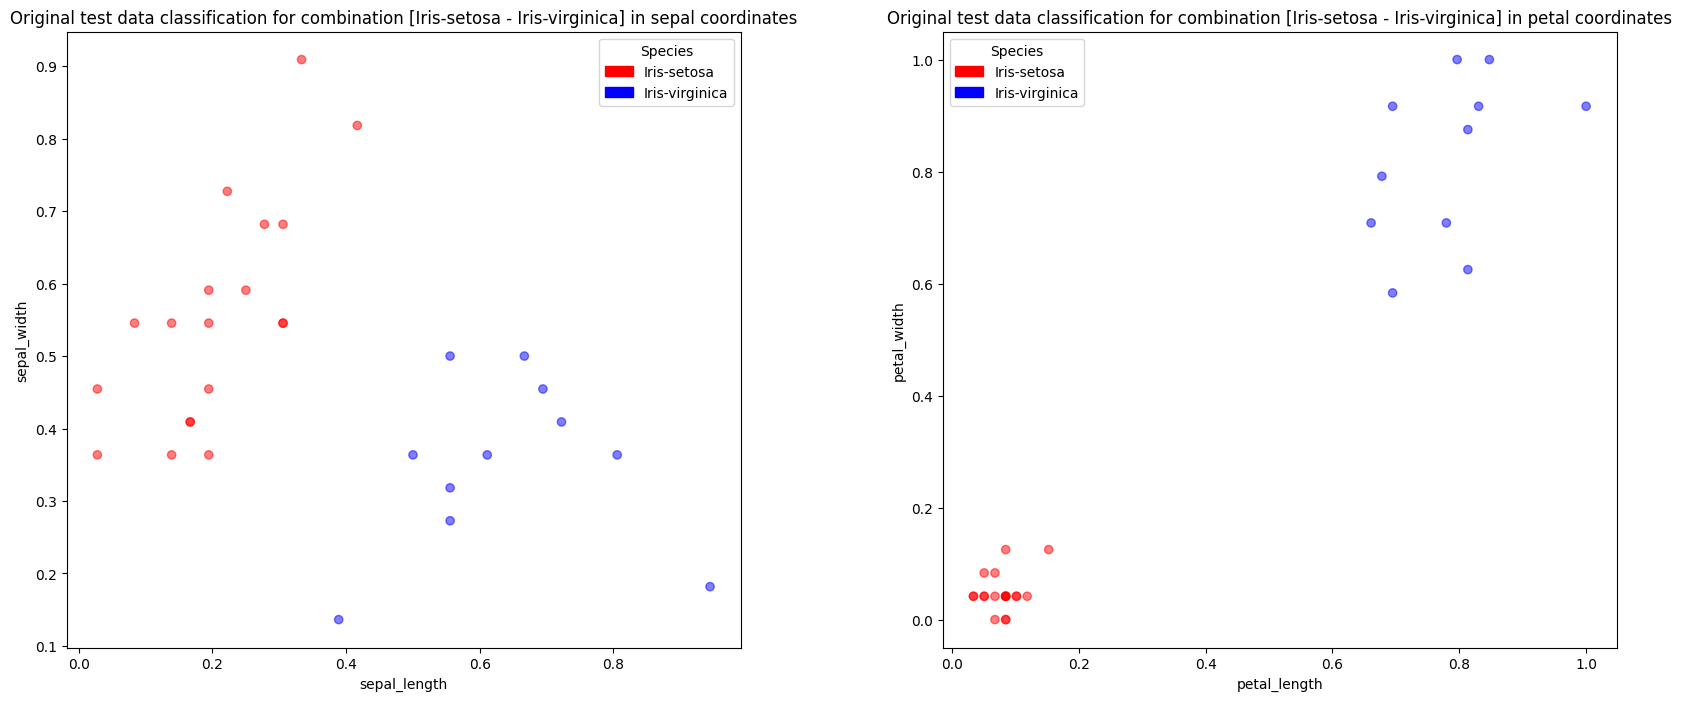

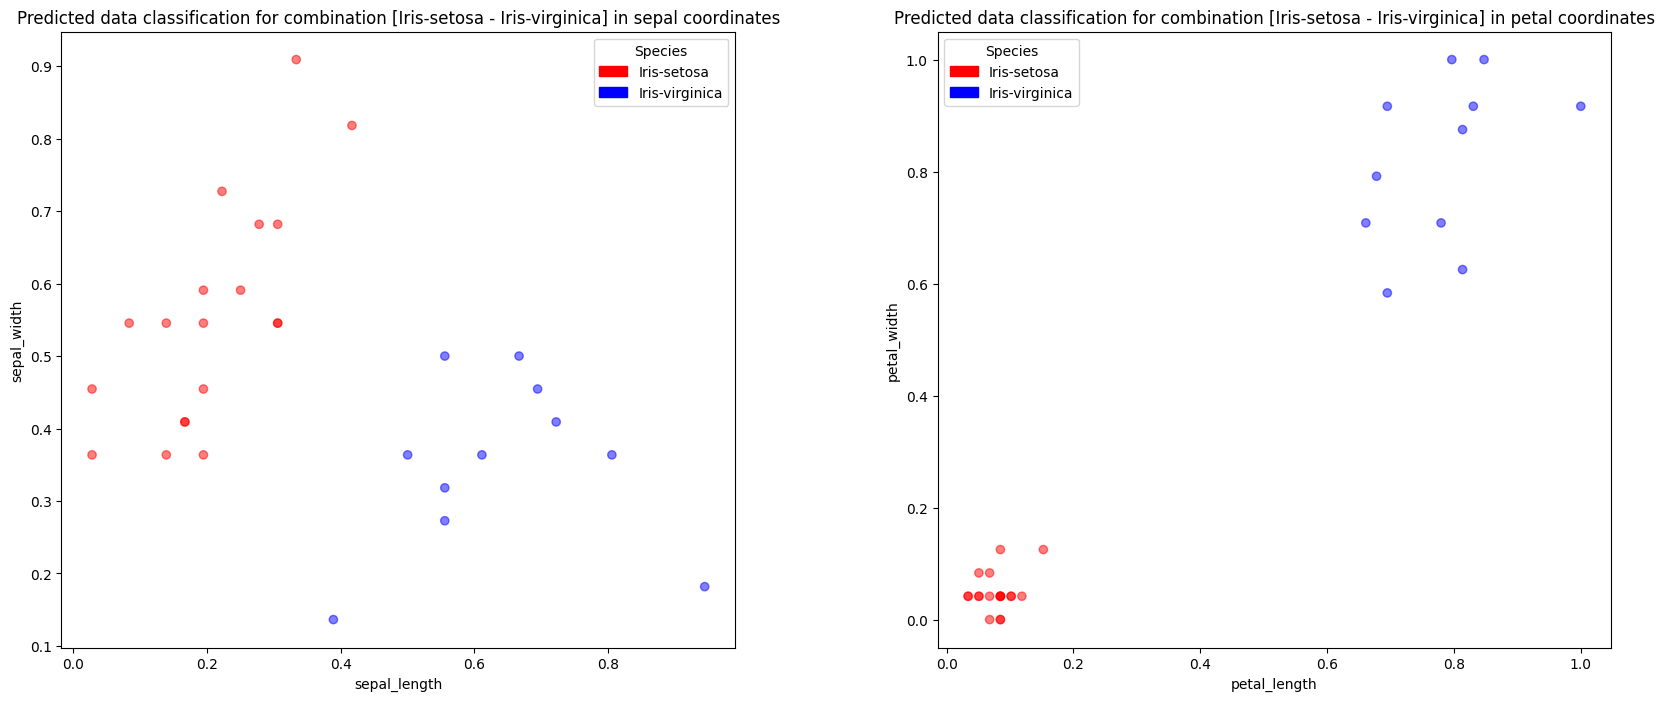

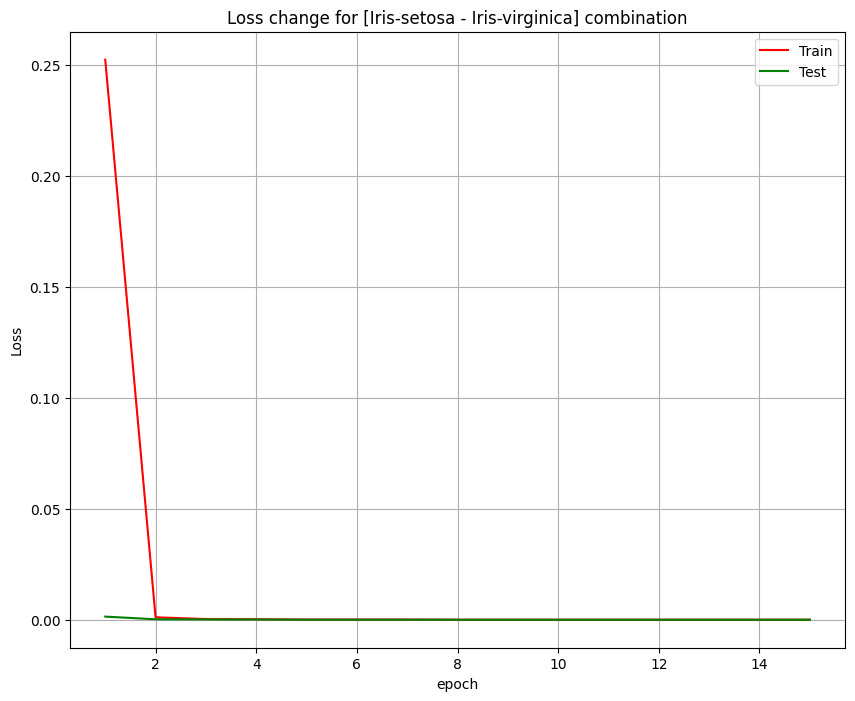

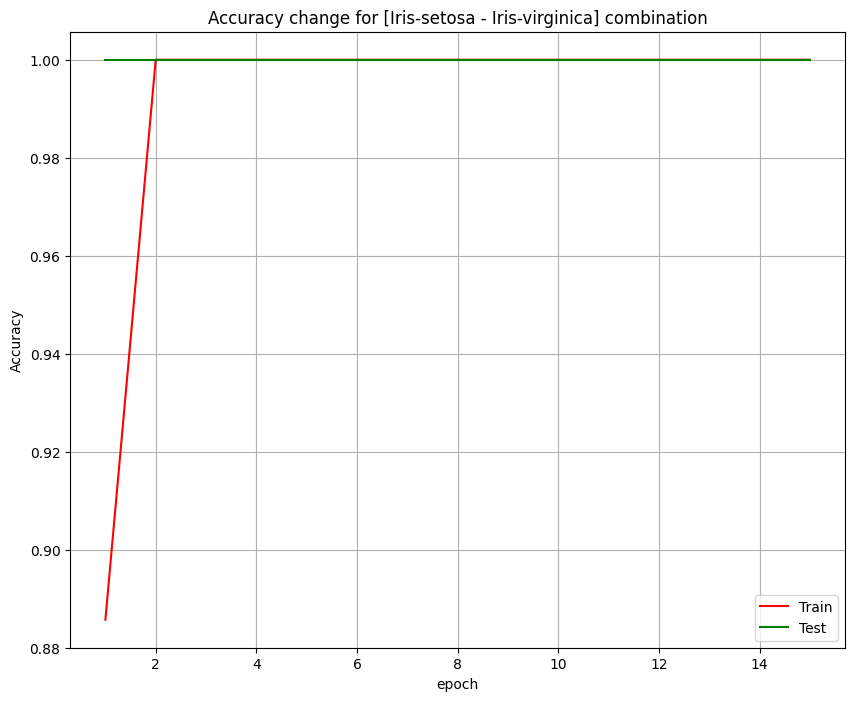

In [16]:
species = [
    [['Iris-setosa', 'Iris-versicolor'], 'Iris-virginica'],
    [['Iris-versicolor', 'Iris-virginica'], 'Iris-setosa'],
    [['Iris-setosa', 'Iris-virginica'], 'Iris-versicolor'],
]

for specie_comb in species:

    train_dataset, test_dataset = get_iris_dataset(specie_comb[0], specie_comb[1])

    layers = [
        FullyConnected(128, LeakyRelu()),
        FullyConnected(128, LeakyRelu()),
        FullyConnected(128, LeakyRelu()),
        FullyConnected(1, Sigmoid())
    ]
    nn = NeuralNetwork(
        Input(4),
        layers,
        optimizer=Adam(),
        loss=BinaryCrossEntropy(),
        metric=Accuracy(),
        convert_prediction='binary'
    )

    print(f"Testing combination {specie_comb[0][0]} - {specie_comb[0][1]}")

    start_time = time.time()
    epochs = 15
    history = nn.fit(train_dataset, test_dataset, epochs=epochs, batch_size=1, verbose=True)

    prediction = nn.predict(test_dataset)

    predicted = []
    for index, predict in enumerate(prediction):
        predicted.append({
            'input': test_dataset[index]['input'],
            'output': predict
        })

    print("--- %s seconds ---" % (time.time() - start_time))

    iris_plot(test_dataset, specie_comb[0], 'Original test data classification')
    iris_plot(predicted, specie_comb[0], 'Predicted data classification')

    epoch = [epoch_data['epoch'] for epoch_data in history]
    train_loss = [epoch_data['train_loss'] for epoch_data in history]
    test_loss = [epoch_data['test_loss'] for epoch_data in history]
    train_metric = [epoch_data['train_metric'] for epoch_data in history]
    test_metric = [epoch_data['test_metric'] for epoch_data in history]

    plot_loss(epoch, train_loss, test_loss, f"Loss change for [{specie_comb[0][0]} - {specie_comb[0][1]}] combination")
    plot_accuracy_score(epoch, train_metric, test_metric, f"Accuracy change for [{specie_comb[0][0]} - {specie_comb[0][1]}] combination")